In [1]:
import numpy as np
import math
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
D = 26
nPx = np.sqrt(2770563/3)
#nPx = 201
print "Pupil sampling: %d"%int(nPx)
src  = ceo.Source("R",rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25.0])
zen = np.ones(3)*8*ceo.constants.ARCMIN2RAD
azi = np.arange(3)*2*np.pi/3
tsrc  = ceo.Source("R",zenith=zen,azimuth=azi,rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25.0])

Pupil sampling: 961


In [3]:
tid = ceo.StopWatch()

In [4]:
gmt = ceo.GMT_MX(M1_mirror_modes=u'bending modes',M1_N_MODE=42)

/home/ubuntu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


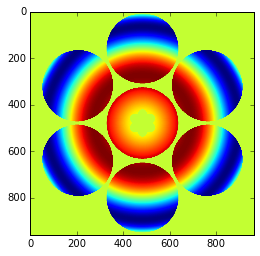

In [5]:
src.reset()
gmt.propagate(src)
imshow(src.phase.host(shape=(nPx,nPx)))

# Segmented Aperture

## One source

In [6]:
N = 10
tid.tic()
for k in range(N):
    src.reset()
    gmt.M1.modes.a[0,0] = 1e-6
    gmt.M1.modes.update()
    gmt.propagate(src)
tid.toc()
print "Segmented GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime/N)

Segmented GMT ray tracing elasped time: 370ms


In [6]:
N = 10
tid.tic()
for k in range(N):
    src.reset()
    gmt.M1.modes.a[0,0] = 1e-6
    gmt.M1.modes.update()
    gmt.propagate(src)
tid.toc()
print "Segmented GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime/N)

Segmented GMT ray tracing elasped time: 140ms


## Three sources

In [7]:
N = 10
tid.tic()
for k in range(N):
    tsrc.reset()
    gmt.propagate(tsrc)
tid.toc()
print "Segmented GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime/N)

Segmented GMT ray tracing elasped time: 1310ms


In [7]:
N = 10
tid.tic()
for k in range(N):
    tsrc.reset()
    gmt.propagate(tsrc)
tid.toc()
print "Segmented GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime/N)

Segmented GMT ray tracing elasped time: 427ms


In [112]:
26.0/nPx

0.12935323383084577

In [114]:
(250)*1e-3*200*1

50.0

In [19]:
(750)*1e-3*200*1

150.0

## With a Shack-Hartman WFS

In [6]:
wfs  = ceo.ShackHartmann(30,32,25.5/30,N_PX_IMAGE=40,BIN_IMAGE=5)
twfs = ceo.ShackHartmann(30,32,25.5/30,N_PX_IMAGE=40,BIN_IMAGE=5,N_GS=3)

## One source

In [7]:
N = 10
tid.tic()
for k in range(N):
    src.reset()
    gmt.propagate(src)
    wfs.reset()
    wfs.propagate(src)
tid.toc()
print "Segmented GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime/N)

Segmented GMT ray tracing elasped time: 146ms


## Three sources

In [8]:
N = 10
tid.tic()
for k in range(N):
    tsrc.reset()
    gmt.propagate(tsrc)
    wfs.reset()
    wfs.propagate(src)
tid.toc()
print "Segmented GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime/N)

Segmented GMT ray tracing elasped time: 439ms


# The case of M1

In [8]:
nPx = 961
src  = ceo.Source("R",rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25.0])
zen = np.ones(3)*8*ceo.constants.ARCMIN2RAD
azi = np.arange(3)*2*np.pi/3
tsrc  = ceo.Source("R",zenith=zen,azimuth=azi,rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25.0])

In [9]:
M1 = ceo.GMT_M1()
ZM1 = ceo.GMT_M1(mirror_modes=u'zernike',radial_order=8)
BM1 = ceo.GMT_M1(mirror_modes=u'bending modes',N_MODE=42)

In [10]:
nPx**2

923521

In [21]:
src.reset()
M1.trace(src.rays)

# of non vignetted rays: 275696 of out 504100 (54.69%)


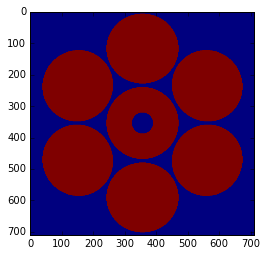

In [47]:
V = src.rays.vignetting.host()
print '# of non vignetted rays: %d of out %d (%.2f%%)'%(V.sum(),nPx**2,100*V.sum()/nPx**2)
plt.imshow(V.reshape(nPx,nPx))

In [8]:
N = 10
tid.tic()
for k in range(N):
    src.reset()
    M1.trace(src.rays)
tid.toc()
print "Segmented GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime/N)

Segmented GMT ray tracing elasped time:  45ms


In [11]:
def M1_timeit(_src_):
    N = 10
    tid.tic()
    for k in range(N):
        _src_.reset()
        M1.trace(_src_.rays)
    tid.toc()
    ET = tid.elapsedTime/N
    tid.tic()
    for k in range(N):
        _src_.reset()
        ZM1.trace(_src_.rays)
    tid.toc()
    ZET = tid.elapsedTime/N
    tid.tic()
    for k in range(N):
        _src_.reset()
        BM1.trace(_src_.rays)
    tid.toc()
    BET = tid.elapsedTime/N
    return (ET,ZET,BET)

In [51]:
print "SINGLE SOURCE"
(ET,ZET,BET) = M1_timeit(src)
print "Segmented GMT ray tracing elasped time: %.3fms"%(ET)
print "Segmented GMT (%d Zernike modes) ray tracing elasped time: %.3fms"%(ZM1.modes.n_mode,ZET)
print "Segmented GMT (%d bending modes) ray tracing elasped time: %.3fms"%(BM1.modes.n_mode,BET)

SINGLE SOURCE
Segmented GMT ray tracing elasped time: 57.208ms
Segmented GMT (45 Zernike modes) ray tracing elasped time: 174.141ms
Segmented GMT (42 bending modes) ray tracing elasped time: 286.053ms


In [12]:
print "SINGLE SOURCE"
(ET,ZET,BET) = M1_timeit(src)
print "Segmented GMT ray tracing elasped time: %.3fms"%(ET)
print "Segmented GMT (%d Zernike modes) ray tracing elasped time: %.3fms"%(ZM1.modes.n_mode,ZET)
print "Segmented GMT (%d bending modes) ray tracing elasped time: %.3fms"%(BM1.modes.n_mode,BET)

SINGLE SOURCE
Segmented GMT ray tracing elasped time: 57.040ms
Segmented GMT (45 Zernike modes) ray tracing elasped time: 174.036ms
Segmented GMT (42 bending modes) ray tracing elasped time: 51.675ms


In [62]:
print "THREE SOURCES"
(ET,ZET,BET) = M1_timeit(tsrc)
print "Segmented GMT ray tracing elasped time: %.3fms"%(ET)
print "Segmented GMT (%d Zernike modes) ray tracing elasped time: %.3fms"%(ZM1.modes.n_mode,ZET)
print "Segmented GMT (%d bending modes) ray tracing elasped time: %.3fms"%(BM1.modes.n_mode,BET)

THREE SOURCES
Segmented GMT ray tracing elasped time: 196.686ms
Segmented GMT (45 Zernike modes) ray tracing elasped time: 675.404ms
Segmented GMT (42 bending modes) ray tracing elasped time: 1057.240ms


In [13]:
print "THREE SOURCES"
(ET,ZET,BET) = M1_timeit(tsrc)
print "Segmented GMT ray tracing elasped time: %.3fms"%(ET)
print "Segmented GMT (%d Zernike modes) ray tracing elasped time: %.3fms"%(ZM1.modes.n_mode,ZET)
print "Segmented GMT (%d bending modes) ray tracing elasped time: %.3fms"%(BM1.modes.n_mode,BET)

THREE SOURCES
Segmented GMT ray tracing elasped time: 196.887ms
Segmented GMT (45 Zernike modes) ray tracing elasped time: 674.806ms
Segmented GMT (42 bending modes) ray tracing elasped time: 172.594ms


### Single segment 

In [62]:
M1.keep(np.array([1],dtype=np.int32))
ZM1.keep(np.array([1],dtype=np.int32))
BM1.keep(np.array([1],dtype=np.int32))

In [63]:
print "SINGLE SOURCE"
(ET,ZET,BET) = M1_timeit(src)
print "Segmented GMT ray tracing elasped time: %.3fms"%(ET)
print "Segmented GMT (%d Zernike modes) ray tracing elasped time: %.3fms"%(ZM1.modes.n_mode,ZET)
print "Segmented GMT (%d bending modes) ray tracing elasped time: %.3fms"%(BM1.modes.n_mode,BET)

SINGLE SOURCE
Segmented GMT ray tracing elasped time: 17.250ms
Segmented GMT (45 Zernike modes) ray tracing elasped time: 37.065ms
Segmented GMT (42 bending modes) ray tracing elasped time: 65.245ms


In [64]:
print "THREE SOURCES"
(ET,ZET,BET) = M1_timeit(tsrc)
print "Segmented GMT ray tracing elasped time: %.3fms"%(ET)
print "Segmented GMT (%d Zernike modes) ray tracing elasped time: %.3fms"%(ZM1.modes.n_mode,ZET)
print "Segmented GMT (%d bending modes) ray tracing elasped time: %.3fms"%(BM1.modes.n_mode,BET)

THREE SOURCES
Segmented GMT ray tracing elasped time: 56.654ms
Segmented GMT (45 Zernike modes) ray tracing elasped time: 134.174ms
Segmented GMT (42 bending modes) ray tracing elasped time: 225.834ms


### M2

In [14]:
M2 = ceo.GMT_M2()

In [15]:
tid.tic()
tsrc.reset()
M1.trace(tsrc.rays)
M2.trace(tsrc.rays)
tid.toc()
print "Segmented GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime)

Segmented GMT ray tracing elasped time: 339ms


In [29]:
tid.tic()
M2.trace(tsrc.rays)
tid.toc()
print "Segmented GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime)

Segmented GMT ray tracing elasped time: 142ms


# Full Aperture

### Aperture

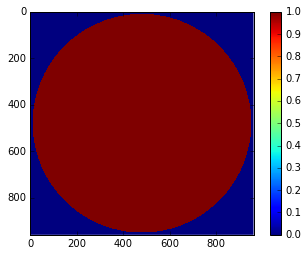

In [43]:
src.reset()
A = ceo.Aperture(25.5,0.0,nPx)
A.vignetting(src)
P = src.rays.vignetting.host().T
imshow(np.reshape(P,(nPx,nPx)),interpolation='none')
colorbar()

### M1

GMT M1 definition:
* curvature radius: 36m
* conic constant: 1-0.9982857

In [44]:
M1 = ceo.Conic(1.0/36.0,1-0.9982857,refractive_index=-1)

### M2

GMT M1 definition:
* curvature radius: 4.1639009m
* conic constant: 1-0.71692784

In [45]:
M2 = ceo.Conic(-1.0/4.1639009,1-0.71692784,
               origin=[0.0,0.0,20.26247614],refractive_index=-1)

### Reflection from M1 and M2

In [47]:
tid.tic()
for k in range(N):
    src.reset()
    A.vignetting(src)
    ceo.Trace(src,[M1,M2])
    src.rays.to_sphere(focal_plane_distance=-5.830,
                       focal_plane_radius=2.197173)
tid.toc()
print "Full GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime/N)

Full GMT ray tracing elasped time: 203ms


In [48]:
tid.tic()
for k in range(N):
    tsrc.reset()
    A.vignetting(tsrc)
    ceo.Trace(tsrc,[M1,M2])
    tsrc.rays.to_sphere(focal_plane_distance=-5.830,
                       focal_plane_radius=2.197173)
tid.toc()
print "Full GMT ray tracing elasped time: %3.fms"%(tid.elapsedTime/N)

Full GMT ray tracing elasped time: 548ms
